In [1]:
import cv2
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from utils import *

data_folder = "/home/cbel/Desktop/zhe/data"

In [2]:
def load_data(df, imgs_path):  
    axial = []
    coronal = []
    sagittal = []
    for i in range(len(imgs_path)):
        num = int(imgs_path[i][-10:-6])
        img = cv2.imread(imgs_path[i], 0)
        img = img[np.newaxis, np.newaxis, :, :]
        if imgs_path[i][-5] == "a":
            axial.append(img)
        elif imgs_path[i][-5] == "c":
            coronal.append(img)
        elif imgs_path[i][-5] == "s":
            sagittal.append(img)
        else:
            print("empty")
    axial = np.array(axial)
    coronal = np.array(coronal)
    sagittal = np.array(sagittal)
    return axial, coronal, sagittal

In [3]:
# dataset = "original"
# output_path = data_folder + f"/multi_view/{dataset}"
# check_folder(output_path)
# df = pd.read_csv(data_folder + "/final_annotation.csv")
# imgs_path = glob(data_folder + "/images/*.png")
# imgs_path.sort()
# axial, coronal, sagittal = load_data(df, imgs_path)
# for i in tqdm(range(len(axial))):
#     merge_img = np.concatenate((axial[i], coronal[i], sagittal[i]), axis=0)
#     np.save(output_path + "/%04d" %(i+1), merge_img)

In [4]:
datasets = ["original", "ENT", "HOM", "GLN", "RLN", "RP", "SRE", "COA"]
for dataset in datasets:
    output_path = data_folder + f"/multi_view/{dataset}"
    check_folder(output_path)
    df = pd.read_csv(data_folder + "/final_annotation.csv")
    imgs_path = glob(data_folder + f"/texture/{dataset}/*.png")
    imgs_path.sort()
    axial, coronal, sagittal = load_data(df, imgs_path)
    for i in tqdm(range(len(axial))):
        merge_img = np.concatenate((axial[i], coronal[i], sagittal[i]), axis=0)
        np.save(output_path + "/%04d" %(i+1), merge_img)

0it [00:00, ?it/s]

/home/cbel/Desktop/zhe/data/multi_view/original目錄已存在
/home/cbel/Desktop/zhe/data/multi_view/ENT目錄已存在



100%|██████████| 1386/1386 [00:00<00:00, 5556.35it/s]


/home/cbel/Desktop/zhe/data/multi_view/HOM目錄已存在


100%|██████████| 1386/1386 [00:00<00:00, 5820.49it/s]


/home/cbel/Desktop/zhe/data/multi_view/GLN目錄已存在


100%|██████████| 1386/1386 [00:00<00:00, 5092.61it/s]


/home/cbel/Desktop/zhe/data/multi_view/RLN目錄已存在


100%|██████████| 1386/1386 [00:00<00:00, 4466.87it/s]


/home/cbel/Desktop/zhe/data/multi_view/RP目錄已存在


100%|██████████| 1386/1386 [00:00<00:00, 5959.72it/s]


/home/cbel/Desktop/zhe/data/multi_view/SRE目錄已存在


100%|██████████| 1386/1386 [00:00<00:00, 6131.63it/s]


/home/cbel/Desktop/zhe/data/multi_view/COA目錄已存在


100%|██████████| 1386/1386 [00:00<00:00, 5526.89it/s]


(3, 1, 32, 32)


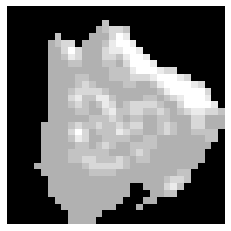

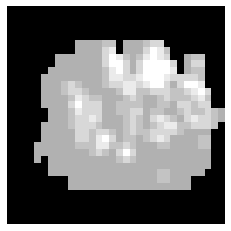

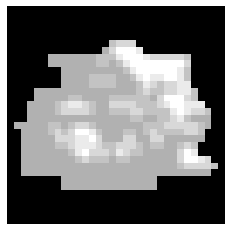

In [5]:
img = np.load(output_path + "/0001.npy")
print(img.shape)
for i in img:
    imshow(np.squeeze(i))